In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg.dsolve import spsolve
from scipy.sparse.linalg import bicgstab, bicg, cg, cgs, gmres, lgmres, minres, qmr, gcrotmk
from IPython.display import HTML
import time
#%matplotlib inline

In [37]:
def coeffs_P3():
    a = (lbda+f0)/T
    b = (f0**2+lbda*f0 -f0*F0)/T
    c = -F0*f0*(lbda+2*f0)/T
    d = (F0*f0)**2/T
    return [a,b,c,d]



In [46]:
def coeffs_Q():
    a,b,c,d = coeffs_P3()
    return [a, 2*b, 3*c, 4*d]

def vitesse_theorique(epsilon= .001,sign=-1):
    roots_Q = np.roots(coeffs_Q())
    candidats = [sign*1000*np.sqrt(T)]
    for x in roots_Q :
        p3_x = np.polyval(coeffs_P3(),x)
        if p3_x < 0:
            candidats += [sign*np.sqrt(-x**4/p3_x)]
    filtre = []
    for s in candidats:
        s_roots = np.roots([1]+[(s+sign*epsilon)**2*x for x in coeffs_P3()])
        s_roots = s_roots[np.isreal(s_roots)]
        if len(s_roots) == 4:
            filtre += [s]
    if sign == 1:
        s_theorique = np.min(filtre)
    else:
        s_theorique = np.max(filtre)
    return s_theorique
            
def plot_roots():
    X =[]
    for n in np.linspace(0,20,10000):
        s = n/2
        roots = np.roots([1]+[s**2*x for x in coeffs_P3()])
        roots = roots[np.isreal(roots)]
        for i in range(len(roots)):
            X+=[[s,roots[i]]]

    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    S = []
    Root = []
    for i in range(len(X)):
        S += [X[i][0]]
        Root += [X[i][1]]
    plt.figsize=(3,3)
    plt.axis((0,10,-5,1))
    plt.scatter(S+(100*[vitesse_theorique(sign=1)]),Root+[-5+ 6*x/100 for x in range(100)],marker='.')
    plt.scatter(S,Root, marker='.')

2.488424998351927


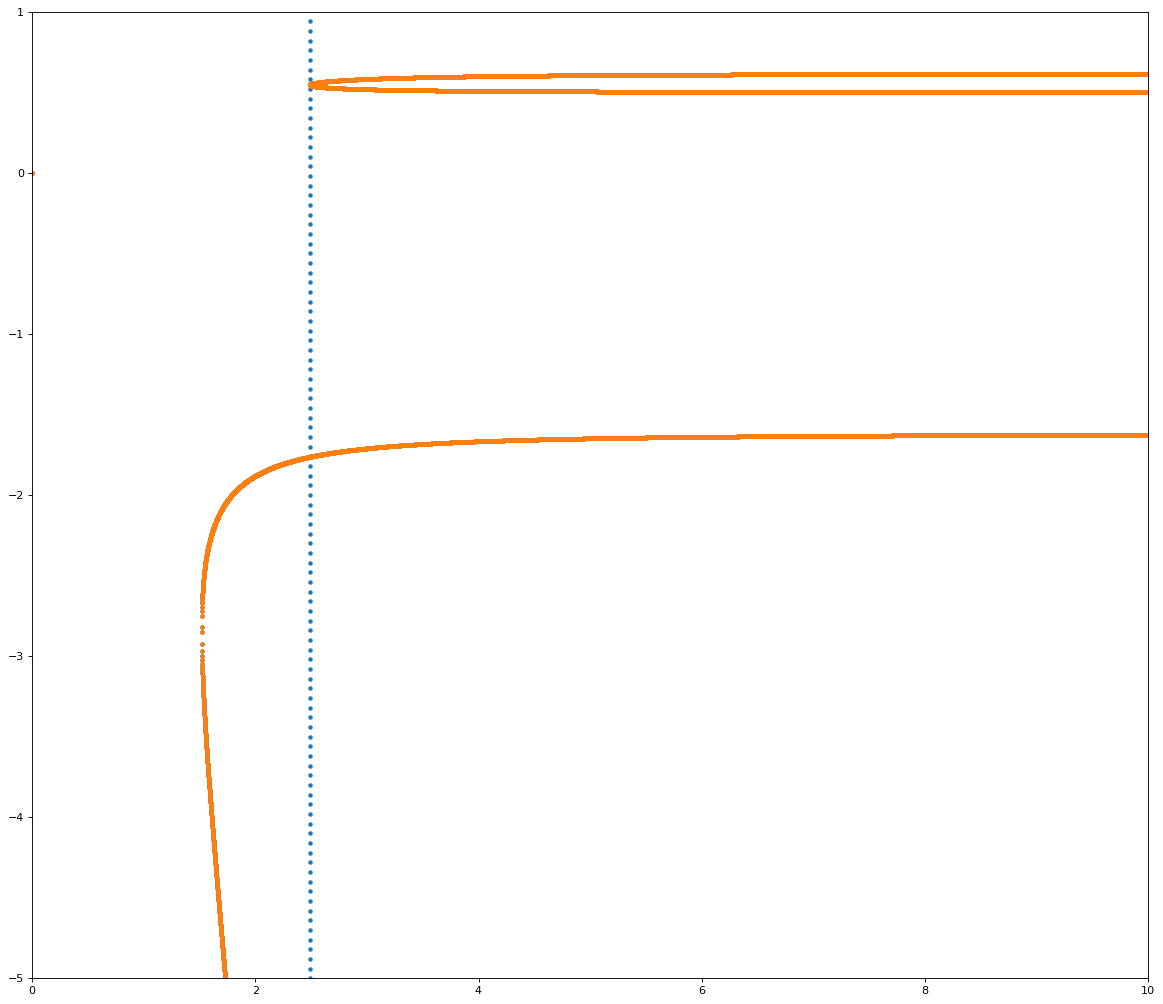

In [47]:
lbda, F0, f0, T = 1,1,1,1
plot_roots()
print(vitesse_theorique(sign=1))

2.322242335054333


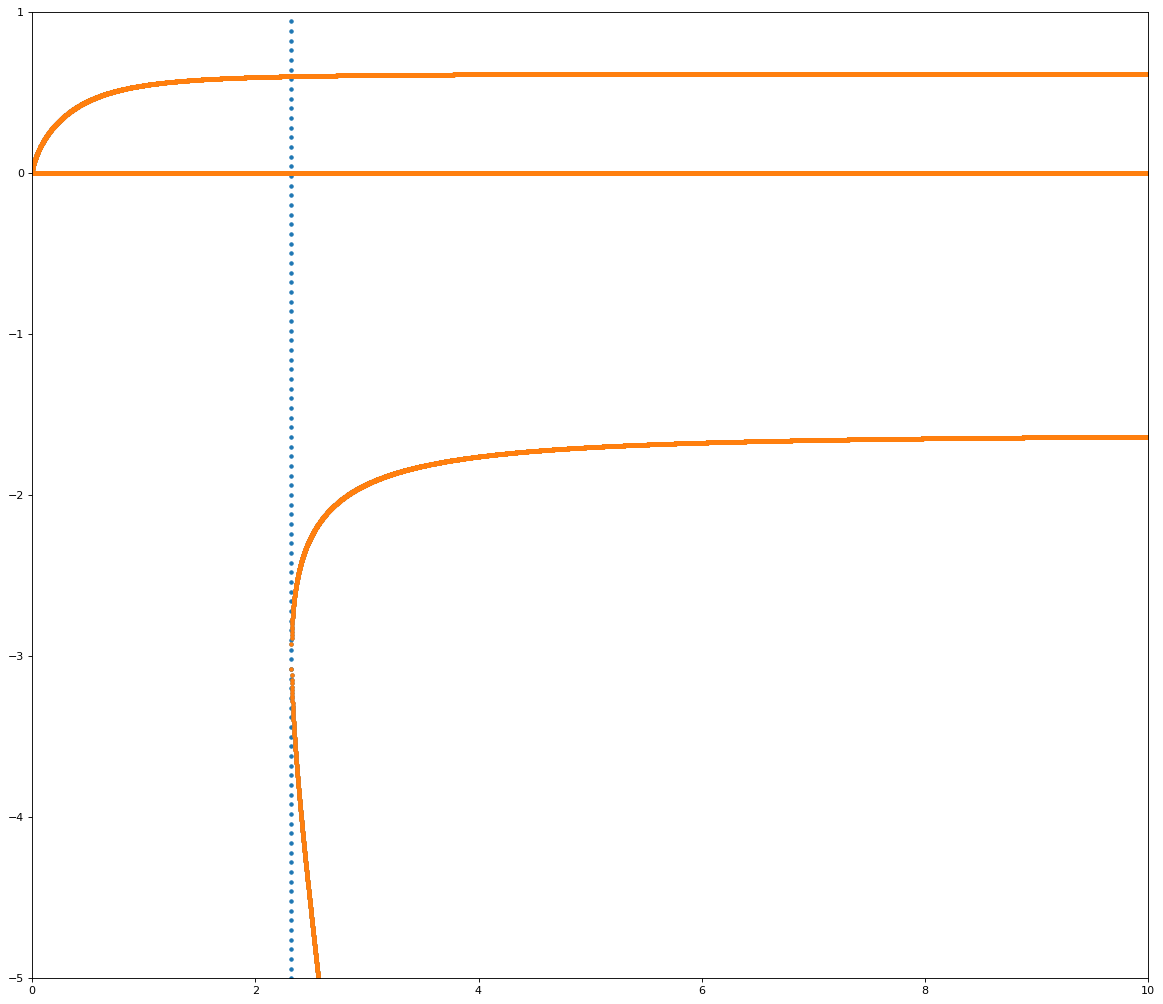

In [50]:
lbda, F0, f0, T = 1000,1,1,1000
plot_roots()
print(vitesse_theorique(sign=1))